In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sn

#plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 


import seaborn as sns
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("../bank.csv",sep=';')

In [3]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
new_features=data[["age","balance","day","duration","campaign","previous","y"]]

x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [5]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [6]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8773480662983425

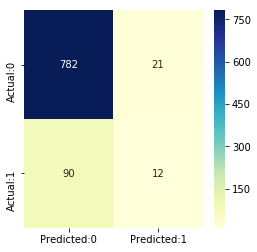

In [7]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (4,4))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [8]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [9]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8773480662983425 
 The Missclassification = 1-Accuracy =  0.1226519337016575 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.11764705882352941 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9738480697384807 
 Positive Predictive value = TP/(TP+FP) =  0.36363636363636365 
 Negative predictive Value = TN/(TN+FN) =  0.8967889908256881 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.498599439775911 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9060478411313374


In [10]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no','Prob of yes'])
y_pred_prob_df.head()

,Prob of no,Prob of yes
0,0.870694,0.129306
1,0.904692,0.095308
2,0.361069,0.638931
3,0.965294,0.034706
4,0.924109,0.075891


AUC: 0.801


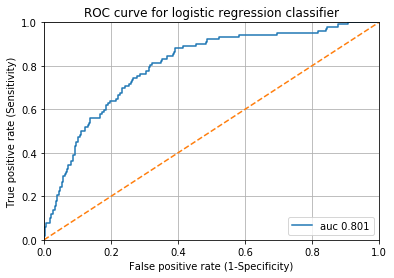

In [11]:
from sklearn.metrics import roc_curve

y_pred_prob_yes=logreg.predict_proba(x_test)
prob = y_pred_prob_yes[:,1]

auc1 = sklearn.metrics.roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc1)

fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label='yes')

plt.plot(fpr,tpr,label="auc %0.3f"%auc1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve for logistic regression classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

plt.legend(loc='lower right')
plt.show()

In [12]:
#Area under curve
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.8013454447781603

In [13]:

print('Train/Test split results:')
print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("log_loss is %2.3f" % log_loss(y_test, y_pred_prob))
print("auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
 accuracy is 0.877
 log_loss is 0.304
 auc is 0.801


## entire data

In [14]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(solver='liblinear')

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many

scores_accuracy = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, x, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, x, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print("average accuracy is %2.3f" % scores_accuracy.mean())
print("average log_loss is %2.3f" % -scores_log_loss.mean())
print("average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
average accuracy is 0.885
 average log_loss is 0.293
 average auc is 0.835
